# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib

# Load Data


In [2]:
df = pd.read_csv('Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.shape

(13320, 9)

# Information about dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


## "total_sft" & size column should be float or int, but it is object data type. Hence, probably something is weird about this column

# Data Cleaning

In [5]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

Handling missing value

In [6]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

'Society' has a lot of missing values and don't have meaningful information for the model. We will remove this column.

In [7]:
df = df.drop(['society','area_type'],axis=1)
#df1.shape

In [8]:
round(df.isnull().mean()*100,2)

availability    0.00
location        0.01
size            0.12
total_sqft      0.00
bath            0.55
balcony         4.57
price           0.00
dtype: float64

In [9]:
df.balcony.describe()

count    12711.000000
mean         1.584376
std          0.817263
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: balcony, dtype: float64

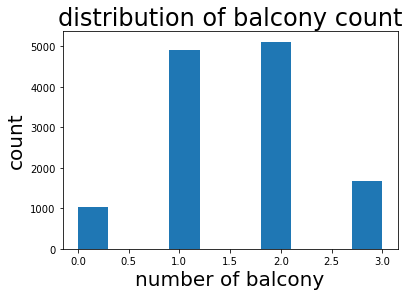

In [10]:
plt.hist(df.balcony)
plt.xlabel('number of balcony',fontsize=20)
plt.ylabel('count',fontsize=20)
plt.title('distribution of balcony count',fontsize=24)
plt.show()

"balcony" has a roughly gaussian distribution, we will take the mean value of balcony to fill in the missing value

In [11]:
balcony_mean = np.round(df.balcony.mean())
df['balcony'].fillna(balcony_mean, inplace=True)
df.head()

,availability,location,size,total_sqft,bath,balcony,price
0,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [12]:
round(df.isnull().mean()*100,2)

availability    0.00
location        0.01
size            0.12
total_sqft      0.00
bath            0.55
balcony         0.00
price           0.00
dtype: float64

Remaining missing value is insignificant, we will just drop them.

In [13]:
df.dropna(axis=0,inplace=True)
df.isnull().sum()

availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64


## Handling Duplicated Rows

In [14]:
print(df.duplicated().sum())
print(df.shape)

606
(13246, 7)


In [15]:
df.drop_duplicates(inplace=True)
print(df.shape)

(12640, 7)


# Feature Engineering

In [16]:
df.nunique()

availability      80
location        1304
size              31
total_sqft      2067
bath              19
balcony            4
price           1955
dtype: int64

since 'size' column have word, create another column with only the number of room

In [17]:
df['bhk'] = df['size'].apply(lambda x : int(x.split(' ')[0]))

In [18]:
df.head()

,availability,location,size,total_sqft,bath,balcony,price,bhk
0,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [19]:
df['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [20]:
df[df.bhk > 20]

,availability,location,size,total_sqft,bath,balcony,price,bhk
1718,Ready To Move,2Electronic City Phase II,27 BHK,8000,27.0,0.0,230.0,27
4684,Ready To Move,Munnekollal,43 Bedroom,2400,40.0,0.0,660.0,43


# 'total_sqft'

In [21]:
df.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [22]:
#function that checks if a value is float
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [23]:
total_sqft_non_single_value=df[~df['total_sqft'].apply(is_float)]
pd.set_option('display.max_rows',len(total_sqft_non_single_value))
total_sqft_non_single_value

,availability,location,size,total_sqft,bath,balcony,price,bhk
30,19-Dec,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,4
122,18-Mar,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,4
137,19-Mar,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,2
165,18-Dec,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490,2
188,Ready To Move,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800,2
410,Ready To Move,Kengeri,1 BHK,34.46Sq. Meter,1.0,0.0,18.500,1
549,18-Sep,Hennur Road,2 BHK,1195 - 1440,2.0,0.0,63.770,2
648,Ready To Move,Arekere,9 Bedroom,4125Perch,9.0,2.0,265.000,9
661,Ready To Move,Yelahanka,2 BHK,1120 - 1145,2.0,0.0,48.130,2
672,18-Mar,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,0.0,445.000,4


# Replacing range values with average of the min. & max. of range 

In [24]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return ((float(tokens[0]))+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [25]:
df['total_sqft'] = df['total_sqft'].apply(convert_sqft_to_num)

availability

In [26]:
df.availability.unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '18-Apr',
       '20-Aug', '19-Mar', '17-Sep', '18-Dec', '17-Aug', '19-Apr',
       '18-Jun', '22-Dec', '22-Jan', '18-Aug', '19-Jan', '17-Jul',
       '18-Jul', '21-Jun', '20-May', '19-Aug', '18-Sep', '17-May',
       '17-Jun', '18-Oct', '21-May', '18-Jan', '20-Mar', '17-Dec',
       '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb', '19-May',
       '17-Nov', '20-Oct', '20-Jun', '19-Feb', '21-Oct', '21-Jan',
       '17-Mar', '17-Apr', '22-May', '19-Oct', '21-Jul', '21-Nov',
       '21-Mar', '16-Dec', '22-Mar', '20-Jan', '21-Sep', '21-Aug',
       '14-Nov', '19-Nov', '15-Nov', '16-Jul', '15-Jun', '17-Feb',
       '20-Nov', '20-Jul', '16-Sep', '15-Oct', '20-Feb', '15-Dec',
       '16-Oct', '22-Nov', '15-Aug', '17-Jan', '16-Nov', '20-Apr',
       '16-Jan', '14-Jul'], dtype=object)

In [27]:
df['ready_to_move'] = df.availability.apply(lambda x : 1 if x == 'Ready To Move' else 0)
df = df.drop(['availability'],axis=1)
df.head()

,location,size,total_sqft,bath,balcony,price,bhk,ready_to_move
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,0
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,1
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,1
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,1
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,1


# Feature Engineering

In [28]:
df['location'].nunique()

1304

In [29]:
df.location = df.location.apply(lambda x : x.strip())
location_stats = df.location.value_counts()
location_stats

Whitefield               517
Sarjapur  Road           372
Electronic City          285
Kanakpura Road           233
Thanisandra              230
                        ... 
T R Mill Road              1
1 Giri Nagar               1
Lakkasandra Extension      1
Gollarahatti               1
Gandhi Nagar               1
Name: location, Length: 1293, dtype: int64

In [30]:
len(location_stats[location_stats<=10])

1060

label location with less than 10 data points as "others", by doing this we reduce the number of categories.

In [31]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

Dodsworth Layout         10
Pattandur Agrahara       10
Gunjur Palya             10
Vasanthapura             10
Naganathapura            10
                         ..
T R Mill Road             1
1 Giri Nagar              1
Lakkasandra Extension     1
Gollarahatti              1
Gandhi Nagar              1
Name: location, Length: 1060, dtype: int64

In [32]:
df.location = df.location.apply(lambda x : 'others' if x in location_stats_less_than_10 else x)
df.location.nunique()

234

# Outliers Removal

Create a new feature "price per sqft" to remove the outlier

In [33]:
df['price_per_sqft'] = df['price']*100000/df['total_sqft']
df.head()

,location,size,total_sqft,bath,balcony,price,bhk,ready_to_move,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,0,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,1,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,1,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,1,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,1,4250.000000


In [34]:
df = df[~(df.total_sqft/df.bhk<300)]
df.shape

(11908, 9)

In [35]:
import seaborn as sns
import re

In [36]:
df_or = df.copy()

C:\Users\lovep\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


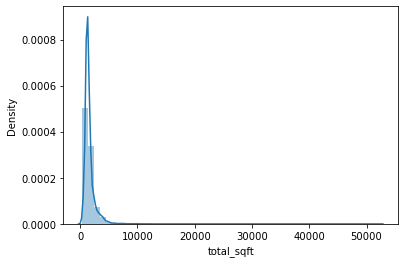

C:\Users\lovep\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


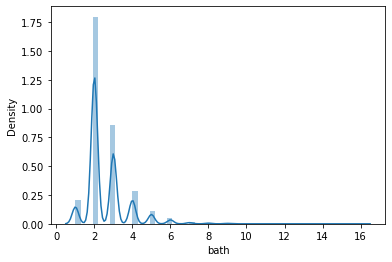

C:\Users\lovep\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


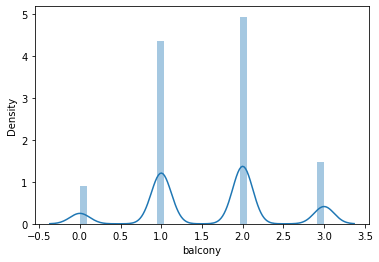

C:\Users\lovep\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


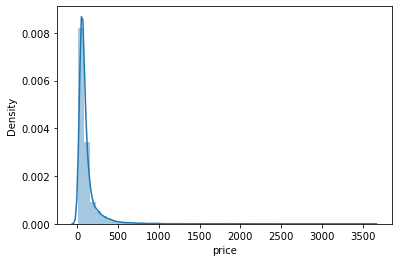

C:\Users\lovep\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


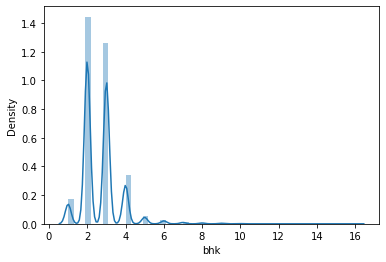

C:\Users\lovep\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


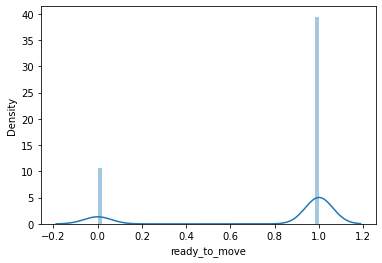

C:\Users\lovep\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


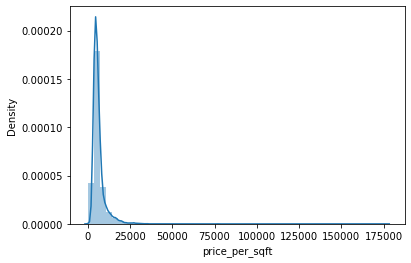

In [37]:
df_or_numerical = df_or.select_dtypes(exclude=['object'])
for feature in df_or_numerical:
    sns.distplot(df_or[feature])
    plt.show()

In [38]:
df.price_per_sqft.describe()

count     11862.000000
mean       6377.700200
std        4243.300116
min         267.829813
25%        4250.000000
50%        5333.333333
75%        6979.907173
max      176470.588235
Name: price_per_sqft, dtype: float64

In [39]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        mean = np.mean(subdf.price_per_sqft)
        std = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(mean-std)) & (subdf.price_per_sqft<=(mean+std))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [40]:
df1 = remove_pps_outliers(df)
df1.shape

(9776, 9)

In [41]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk ==2)]
    bhk3 = df[(df.location==location) & (df.bhk ==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft, bhk2.price,color='b',label='2 BHK', s=70)
    plt.scatter(bhk3.total_sqft, bhk3.price,color='r',label='3 BHK', s=70)
    plt.xlabel('total_sqft')
    plt.ylabel('price')
    plt.title(location)
    plt.legend()

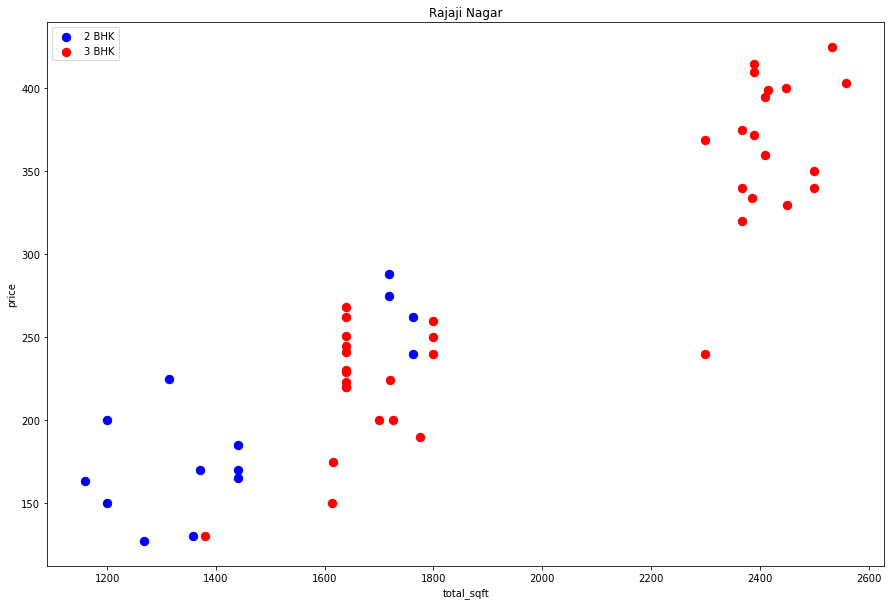

In [42]:
plot_scatter_chart(df1,"Rajaji Nagar")

In [43]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for locations, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk]={
                'mean' : np.mean(bhk_df.price_per_sqft),
                'std' : np.std(bhk_df.price_per_sqft),
                'count' : bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby('bhk'):
            stats= bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [44]:
df1 = remove_bhk_outliers(df1)
df1.shape

(6972, 9)

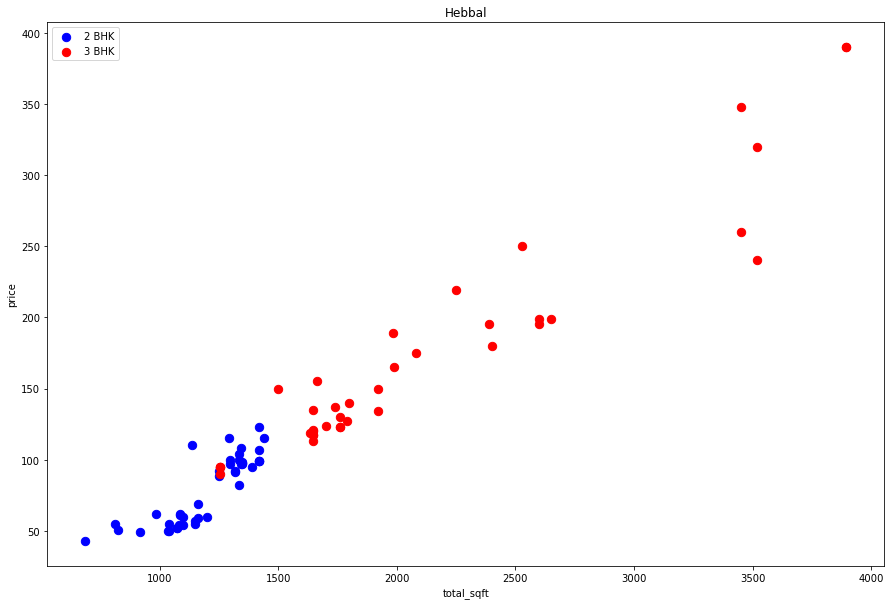

In [45]:
plot_scatter_chart(df1,'Hebbal')

Text(0, 0.5, 'Count')

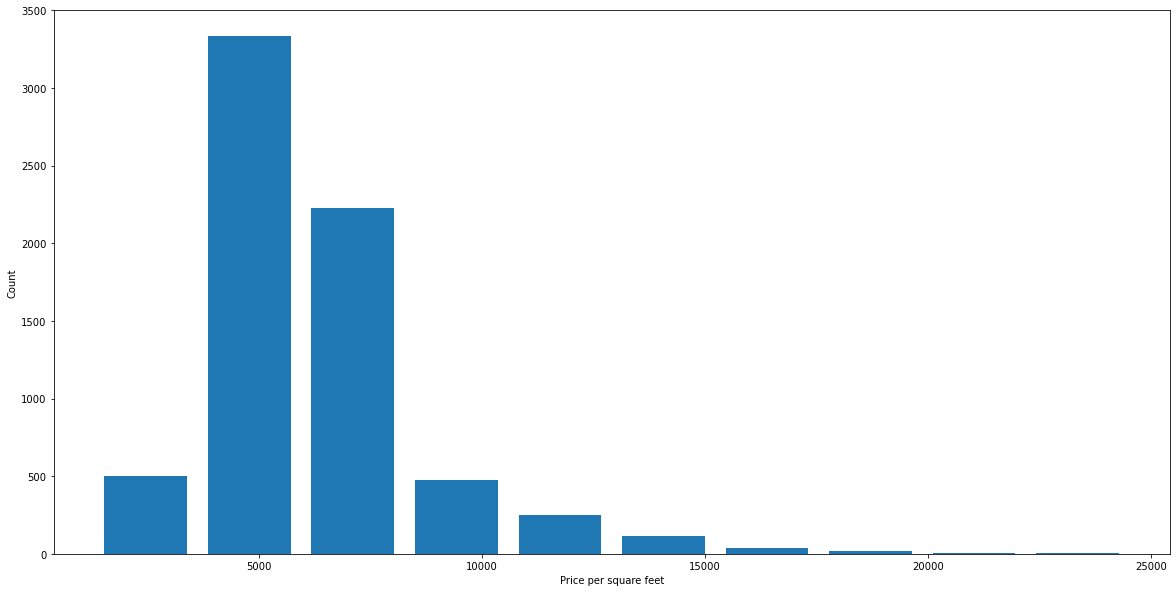

In [46]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)
plt.hist(df1.price_per_sqft,rwidth=0.8)
plt.xlabel('Price per square feet')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

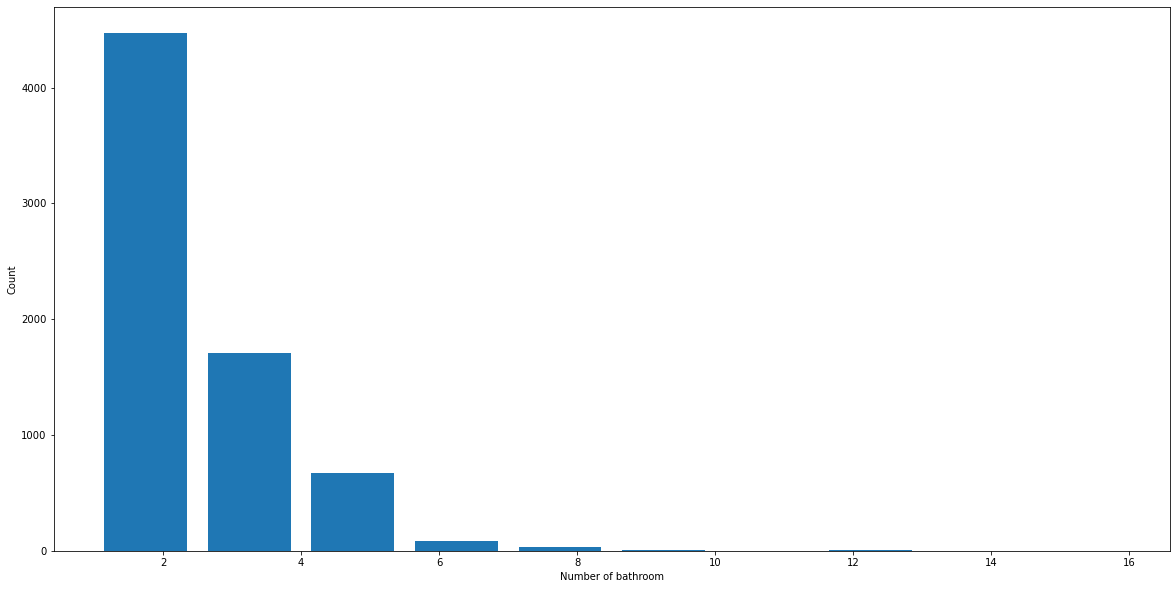

In [47]:
plt.hist(df1.bath,rwidth=0.8)
plt.xlabel('Number of bathroom')
plt.ylabel('Count')

In [48]:
df1 = df1[df1.bath<df1.bhk+2]
df1.shape

(6892, 9)

In [49]:
df_out = df1.drop(['size','price_per_sqft'],axis=1)

In [50]:
df_out.head()

,location,total_sqft,bath,balcony,price,bhk,ready_to_move
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4,0
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3,0
2,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3,1
3,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3,0
4,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2,0


# Save the cleaned data in a new csv file

In [51]:
df_out.to_csv('data/Bengaluru_House_Data_cleaned.csv',index=False)

In [52]:
pd.read_csv('data/Bengaluru_House_Data_cleaned.csv')

,location,total_sqft,bath,balcony,price,bhk,ready_to_move
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4,0
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3,0
2,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3,1
3,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3,0
4,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2,0
...,...,...,...,...,...,...,...
6887,others,1155.0,2.0,1.0,64.0,2,1
6888,others,1200.0,2.0,3.0,70.0,2,0
6889,others,1800.0,1.0,1.0,200.0,1,1
6890,others,812.0,1.0,0.0,26.0,1,0
